In [1]:
import os
import sys
import pyrootutils

pyrootutils.setup_root(os.path.abspath(''), indicator=".project-root", pythonpath=True)
sys.path.append('..')
sys.path.append('')


In [2]:
import itertools

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from torch import Tensor


Setup root:

In [3]:
ROOT = str(pyrootutils.find_root())
FILES_FOLDER = "interpretation_files"
DATA_FOLDER = "data"


Import distances, entropies and importances

In [4]:
distances = pd.read_csv(f"{ROOT}/{DATA_FOLDER}/distances.csv")
entropies = pd.read_csv(f"{ROOT}/{DATA_FOLDER}/entropies.csv")
importances = pd.read_csv(f"{ROOT}/{DATA_FOLDER}/importances.csv")


Mappers:

In [5]:
def general_mapper(**kwargs: list[str]) -> dict[str, list[str]]:
    return {"_".join(l): [*l] for l in list(itertools.product(*kwargs.values()))}

name_mapper = {
    "encoder_only_C2C": "C2C",
    "encoder_only_R2C": "R2C",
    "encoder_only_E2C": "E2C",
    "encoder_only_MC2C": "MC2C",
    "encoder_only_MR2C": "MR2C",
    "encoder_only_ME2C": "ME2C",
    "encoder_decoder_C2C": "C2C",
    "encoder_decoder_R2C": "R2C",
    "encoder_decoder_E2C": "E2C",
    "encoder_decoder_MC2C": "MC2C",
    "encoder_decoder_MR2C": "MR2C",
    "encoder_decoder_ME2C": "ME2C",
    "native": "Native",
    "untrained": "Untrained",
    "encoder_decoder_ME2C_256": "256",
    "encoder_decoder_ME2C_128": "128",
    "encoder_decoder_ME2C_64": "64",
    "encoder_decoder_ME2C_0_1": "10%",
    "encoder_decoder_ME2C_0_2": "20%",
    "encoder_decoder_ME2C_0_5": "50%",
    "encoder_decoder_ME2C_train": "Training data",
    "encoder_decoder_ME2C_random": "Random split",
    "encoder_decoder_ME2C_cnn": "CNN",
    "encoder_decoder_ME2C_enum": "Enumerated",
}


Visualize distances

In [6]:
# data
figure_models = [
    "encoder_decoder_ME2C",
    "native", "untrained",
    "encoder_decoder_ME2C_random",
    "encoder_decoder_ME2C_cnn",
    "encoder_decoder_ME2C_enum",
    "encoder_decoder_ME2C_train",
]
figure_methods = ["ig", "shap","attention_maps", "rollout", "grad", "att_grad", "cat", "att_cat"]
figure_sections = ["full"]

figure_selection = (figure_models, figure_methods, figure_sections)
figure_selection = ["_".join(l) for l in list(itertools.product(*figure_selection))]

figure_data = distances[figure_selection]
figure_data = pd.melt(figure_data)
figure_data["names"] = figure_data.variable.map(general_mapper(models=figure_models, methods=figure_methods, sections=figure_sections))
figure_data[['names', 'methods', 'sections']] = pd.DataFrame(figure_data.names.tolist(), index=figure_data.index)
figure_data['training'] = figure_data.names.map(name_mapper)

base = "encoder_decoder_ME2C"
randomization = ["native", "untrained"]
training = ["encoder_decoder_ME2C_train"]
random_split = ["encoder_decoder_ME2C_random"]
cnn = ["encoder_decoder_ME2C_cnn"]
enumeration = ["encoder_decoder_ME2C_enum"]

baseline = figure_data[figure_data["names"].apply(lambda x: x in [base])]
rand = figure_data[figure_data["names"].apply(lambda x: x in randomization)]
train = figure_data[figure_data["names"].apply(lambda x: x in training)]
split = figure_data[figure_data["names"].apply(lambda x: x in random_split)]
cnn_model = figure_data[figure_data["names"].apply(lambda x: x in cnn)]
enum = figure_data[figure_data["names"].apply(lambda x: x in enumeration)]


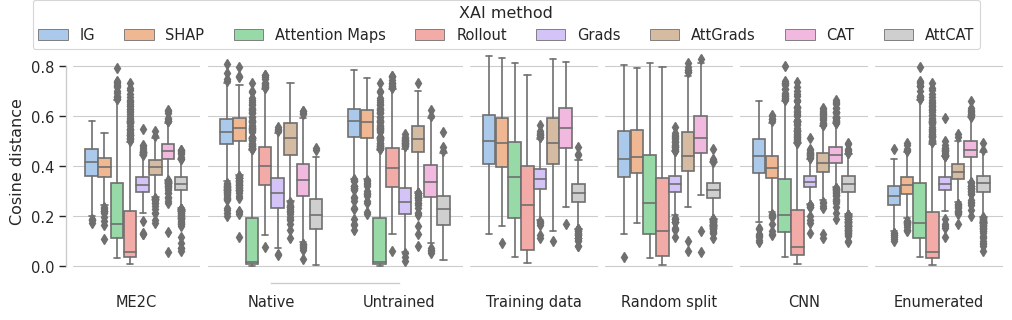

In [7]:
sns.set_theme(style="whitegrid", palette="pastel", context="paper", font_scale=1.2)

fig, axs = plt.subplots(1, 6, figsize=(12, 3), sharey=True, gridspec_kw={'width_ratios': [1,2,1,1,1,1]})
for ax, data in zip(axs, [baseline, rand, train, split, cnn_model, enum]):
    sns.boxplot(x="training", y="value", hue="methods", data=data, ax=ax)

# Set common legend
handles, labels = axs[0].get_legend_handles_labels()
method_mapper = {
    'ig': 'IG', 'shap': 'SHAP', 'attention_maps': 'Attention Maps', 'rollout': 'Rollout',
    'grad': 'Grads', 'att_grad': 'AttGrads', 'cat': 'CAT', 'att_cat': 'AttCAT'
}
labels = [method_mapper[x] for x in labels]
fig.legend(handles, labels, title="XAI method", loc='upper center', borderaxespad=0, ncol=8)

# Set ticks
for ax in axs:
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(left=False)
    sns.despine(ax=ax, left=True, offset=5, trim=True)

axs[0].tick_params(left=True)
sns.despine(ax=axs[0], left=False, offset=5, trim=True)

# Set common labels
axs[0].set_ylabel('Cosine distance')

# Show
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()

# save
# fig.savefig('Figures/distances_models.pdf', format='pdf', bbox_inches='tight')


Visualize entropies

In [8]:
# data
figure_models = [
    "encoder_decoder_ME2C",
    "native", "untrained",
    "encoder_decoder_ME2C_random",
    "encoder_decoder_ME2C_cnn",
    "encoder_decoder_ME2C_enum",
    "encoder_decoder_ME2C_train",
]
figure_methods = ["ig", "shap","attention_maps", "rollout", "grad", "att_grad", "cat", "att_cat"]
figure_sections = ["canon"]
figure_parts = ["atom"]

figure_selection = (figure_models, figure_methods, figure_sections, figure_parts)
figure_selection = ["_".join(l) for l in list(itertools.product(*figure_selection))]

figure_data = entropies[figure_selection]
figure_data = pd.melt(figure_data)
figure_data["names"] = figure_data.variable.map(general_mapper(
    models=figure_models, methods=figure_methods, sections=figure_sections, parts=figure_parts
))
figure_data[['names', 'methods', 'sections', "parts"]] = pd.DataFrame(figure_data.names.tolist(), index=figure_data.index)
figure_data['training'] = figure_data.names.map(name_mapper)

figure_sections = ["averaged"]
figure_selection = (figure_models, figure_methods, figure_sections, figure_parts)
figure_selection = ["_".join(l) for l in list(itertools.product(*figure_selection))]
averaged_figure_data = entropies[figure_selection]
averaged_figure_data = pd.melt(averaged_figure_data)
averaged_figure_data["names"] = averaged_figure_data.variable.map(general_mapper(
    models=figure_models, methods=figure_methods, sections=figure_sections, parts=figure_parts
))
averaged_figure_data[['names', 'methods', 'sections', "parts"]] = pd.DataFrame(averaged_figure_data.names.tolist(), index=averaged_figure_data.index)
averaged_figure_data['training'] = averaged_figure_data.names.map(name_mapper)

base = "encoder_decoder_ME2C"
randomization = ["native", "untrained"]
training = ["encoder_decoder_ME2C_train"]
random_split = ["encoder_decoder_ME2C_random"]
cnn = ["encoder_decoder_ME2C_cnn"]
enumeration = ["encoder_decoder_ME2C_enum"]

baseline = figure_data[figure_data["names"].apply(lambda x: x in [base])]
rand = figure_data[figure_data["names"].apply(lambda x: x in randomization)]
train = figure_data[figure_data["names"].apply(lambda x: x in training)]
split = figure_data[figure_data["names"].apply(lambda x: x in random_split)]
cnn_model = figure_data[figure_data["names"].apply(lambda x: x in cnn)]
enum = figure_data[figure_data["names"].apply(lambda x: x in enumeration)]
aver = averaged_figure_data[averaged_figure_data["names"].apply(lambda x: x in [base])]
aver.loc[:, "training"] = "Averaged"


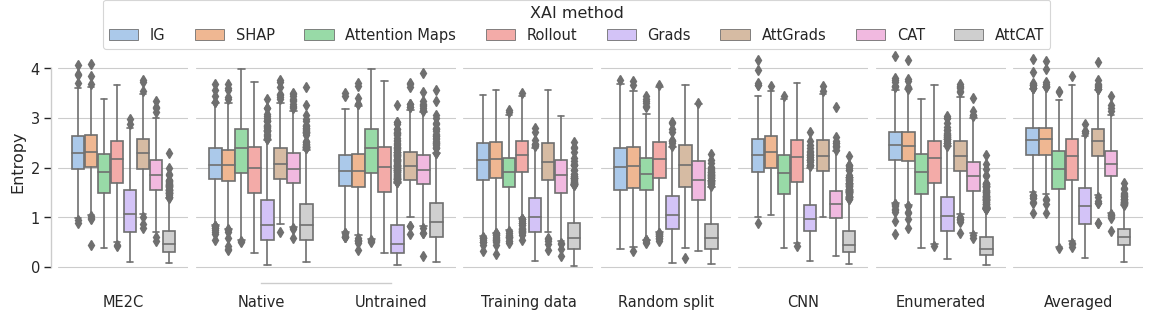

In [9]:
sns.set_theme(style="whitegrid", palette="pastel", context="paper", font_scale=1.2)

fig, axs = plt.subplots(1, 7, figsize=(14, 3), sharey=True, gridspec_kw={'width_ratios': [1,2,1,1,1,1,1]})
for ax, data in zip(axs, [baseline, rand, train, split, cnn_model, enum, aver]):
    sns.boxplot(x="training", y="value", hue="methods", data=data, ax=ax)

# Set common legend
handles, labels = axs[0].get_legend_handles_labels()
method_mapper = {
    'ig': 'IG', 'shap': 'SHAP', 'attention_maps': 'Attention Maps', 'rollout': 'Rollout',
    'grad': 'Grads', 'att_grad': 'AttGrads', 'cat': 'CAT', 'att_cat': 'AttCAT'
}
labels = [method_mapper[x] for x in labels]
fig.legend(handles, labels, title="XAI method", loc='upper center', borderaxespad=0, ncol=8)

# Set ticks
for ax in axs:
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(left=False)
    sns.despine(ax=ax, left=True, offset=5, trim=True)

axs[0].tick_params(left=True)
sns.despine(ax=axs[0], left=False, offset=5, trim=True)

# Set common labels
axs[0].set_ylabel('Entropy')

# Show
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()

# save
# fig.savefig('Figures/distances_models.pdf', format='pdf', bbox_inches='tight')


Visualize importances

In [10]:
# data
figure_models = [
    "encoder_decoder_ME2C",
    "native", "untrained",
    "encoder_decoder_ME2C_random",
    "encoder_decoder_ME2C_cnn",
    "encoder_decoder_ME2C_enum",
    "encoder_decoder_ME2C_train",
]
figure_methods = ["ig", "shap","attention_maps", "rollout", "grad", "att_grad", "cat", "att_cat"]
figure_sections = ["canon"]
figure_parts = ["hit_only"]

figure_selection = (figure_models, figure_methods, figure_sections, figure_parts)
figure_selection = ["_".join(l) for l in list(itertools.product(*figure_selection))]

figure_data = importances[figure_selection]
figure_data = pd.melt(figure_data)
figure_data["names"] = figure_data.variable.map(general_mapper(
    models=figure_models, methods=figure_methods, sections=figure_sections, parts=figure_parts
))
figure_data[['names', 'methods', 'sections', "parts"]] = pd.DataFrame(figure_data.names.tolist(), index=figure_data.index)
figure_data['training'] = figure_data.names.map(name_mapper)

figure_sections = ["averaged"]
figure_selection = (figure_models, figure_methods, figure_sections, figure_parts)
figure_selection = ["_".join(l) for l in list(itertools.product(*figure_selection))]
averaged_figure_data = importances[figure_selection]
averaged_figure_data = pd.melt(averaged_figure_data)
averaged_figure_data["names"] = averaged_figure_data.variable.map(general_mapper(
    models=figure_models, methods=figure_methods, sections=figure_sections, parts=figure_parts
))
averaged_figure_data[['names', 'methods', 'sections', "parts"]] = pd.DataFrame(averaged_figure_data.names.tolist(), index=averaged_figure_data.index)
averaged_figure_data['training'] = averaged_figure_data.names.map(name_mapper)

base = "encoder_decoder_ME2C"
randomization = ["native", "untrained"]
training = ["encoder_decoder_ME2C_train"]
random_split = ["encoder_decoder_ME2C_random"]
cnn = ["encoder_decoder_ME2C_cnn"]
enumeration = ["encoder_decoder_ME2C_enum"]

baseline = figure_data[figure_data["names"].apply(lambda x: x in [base])]
rand = figure_data[figure_data["names"].apply(lambda x: x in randomization)]
train = figure_data[figure_data["names"].apply(lambda x: x in training)]
split = figure_data[figure_data["names"].apply(lambda x: x in random_split)]
cnn_model = figure_data[figure_data["names"].apply(lambda x: x in cnn)]
enum = figure_data[figure_data["names"].apply(lambda x: x in enumeration)]
aver = averaged_figure_data[averaged_figure_data["names"].apply(lambda x: x in [base])]
aver.loc[:, "training"] = "Averaged"


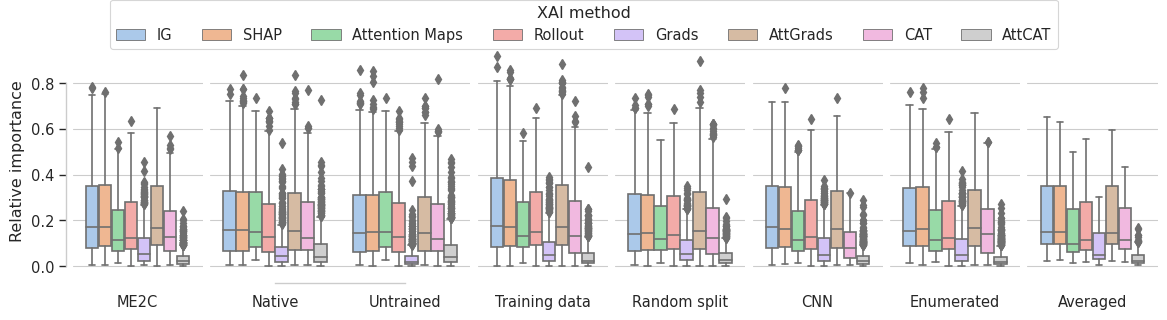

In [11]:
sns.set_theme(style="whitegrid", palette="pastel", context="paper", font_scale=1.2)

fig, axs = plt.subplots(1, 7, figsize=(14, 3), sharey=True, gridspec_kw={'width_ratios': [1,2,1,1,1,1,1]})
for ax, data in zip(axs, [baseline, rand, train, split, cnn_model, enum, aver]):
    sns.boxplot(x="training", y="value", hue="methods", data=data, ax=ax)

# Set common legend
handles, labels = axs[0].get_legend_handles_labels()
method_mapper = {
    'ig': 'IG', 'shap': 'SHAP', 'attention_maps': 'Attention Maps', 'rollout': 'Rollout',
    'grad': 'Grads', 'att_grad': 'AttGrads', 'cat': 'CAT', 'att_cat': 'AttCAT'
}
labels = [method_mapper[x] for x in labels]
fig.legend(handles, labels, title="XAI method", loc='upper center', borderaxespad=0, ncol=8)

# Set ticks
for ax in axs:
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(left=False)
    sns.despine(ax=ax, left=True, offset=5, trim=True)

axs[0].tick_params(left=True)
sns.despine(ax=axs[0], left=False, offset=5, trim=True)

# Set common labels
axs[0].set_ylabel('Relative importance')

# Show
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()


# save
# fig.savefig('Figures/distances_models.pdf', format='pdf', bbox_inches='tight')


In [12]:
# data
figure_models = [
    "encoder_decoder_ME2C",
    "native", "untrained",
    "encoder_decoder_ME2C_random",
    "encoder_decoder_ME2C_cnn",
    "encoder_decoder_ME2C_enum",
    "encoder_decoder_ME2C_train",
]
figure_methods = ["ig", "shap","attention_maps", "rollout", "grad", "att_grad", "cat", "att_cat"]
figure_sections = ["canon"]
figure_parts = ["smile", "atom", "hit_only"]

figure_selection = (figure_models, figure_methods, figure_sections, figure_parts)
figure_selection = ["_".join(l) for l in list(itertools.product(*figure_selection))]

figure_data = importances[figure_selection]
figure_data = pd.melt(figure_data)
figure_data["names"] = figure_data.variable.map(general_mapper(
    models=figure_models, methods=figure_methods, sections=figure_sections, parts=figure_parts
))
figure_data[['names', 'methods', 'sections', "parts"]] = pd.DataFrame(figure_data.names.tolist(), index=figure_data.index)
figure_data['training'] = figure_data.names.map(name_mapper)

base = "encoder_decoder_ME2C"
randomization = ["native", "untrained"]
training = ["encoder_decoder_ME2C_train"]
random_split = ["encoder_decoder_ME2C_random"]
cnn = ["encoder_decoder_ME2C_cnn"]
enumeration = ["encoder_decoder_ME2C_enum"]

baseline = figure_data[figure_data["names"].apply(lambda x: x in [base])]
rand = figure_data[figure_data["names"].apply(lambda x: x in randomization)]
train = figure_data[figure_data["names"].apply(lambda x: x in training)]
split = figure_data[figure_data["names"].apply(lambda x: x in random_split)]
cnn_model = figure_data[figure_data["names"].apply(lambda x: x in cnn)]
enum = figure_data[figure_data["names"].apply(lambda x: x in enumeration)]


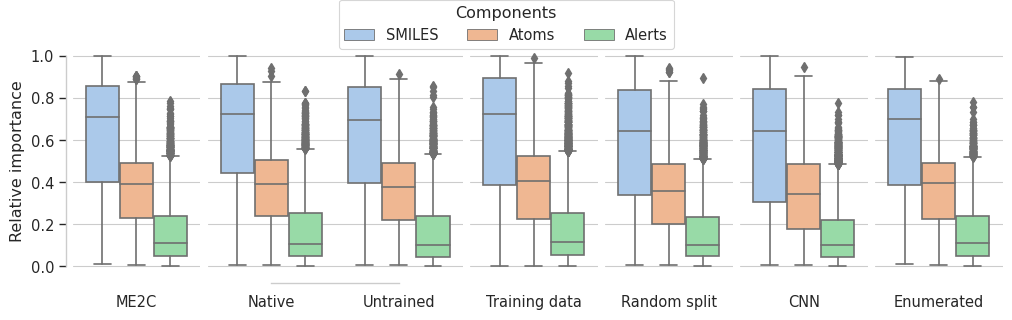

In [13]:
sns.set_theme(style="whitegrid", palette="pastel", context="paper", font_scale=1.2)

fig, axs = plt.subplots(1, 6, figsize=(12, 3), sharey=True, gridspec_kw={'width_ratios': [1,2,1,1,1,1]})
for ax, data in zip(axs, [baseline, rand, train, split, cnn_model, enum, aver]):
    sns.boxplot(x="training", y="value", hue="parts", data=data, ax=ax)

# Set common legend
handles, labels = axs[0].get_legend_handles_labels()
method_mapper = {
    'smile': 'SMILES', 'atom': 'Atoms', 'hit_only': 'Alerts',
}
labels = [method_mapper[x] for x in labels]
fig.legend(handles, labels, title="Components", loc='upper center', borderaxespad=0, ncol=8)

# Set ticks
for ax in axs:
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(left=False)
    sns.despine(ax=ax, left=True, offset=5, trim=True)

axs[0].tick_params(left=True)
sns.despine(ax=axs[0], left=False, offset=5, trim=True)

# Set common labels
axs[0].set_ylabel('Relative importance')

# Show
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()

# save
# fig.savefig('Figures/distances_models.pdf', format='pdf', bbox_inches='tight')
